**Importing Libraries**

In [ ]:
!pip install geopandas
!pip install plotly

In [ ]:
import geopandas  as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

**Mounting the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Different file formats are:

    .shp: The geometry of a data record are saved in the file with the extension .shp. If you want to transform coordinates for example, you only have to transform this file.
    .dbf: Here all factual data or attribute data are saved in dBASE format.
    .shx: Links the factual data (.dbf) with the geometry (.shp) via a common index.


**Whats inside an shp file?**

In [ ]:
shapefile_path = r"/content/drive/MyDrive/last 3 years/IBTrACS.last3years.list.v04r00.lines.shp"
df1 = gpd.read_file(shapefile_path)

In [ ]:
df1.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,USA_SEA_SW,USA_SEA_NW,STORM_SPD,STORM_DR,year,month,day,hour,min,geometry
0,2019001S10162,2019,1,SP,MM,MONA,2018-12-31 18:00:00,NR,-10.20,161.80,...,NaN,NaN,26,79,2018,12,31,18,0,"LINESTRING (161.80005 -10.20000, 163.10510 -9...."
1,2019001S10162,2019,1,SP,MM,MONA,2018-12-31 21:00:00,NR,-9.95,163.10,...,NaN,NaN,26,77,2018,12,31,21,0,"LINESTRING (163.10510 -9.95088, 164.40002 -9.6..."
2,2019001S10162,2019,1,SP,MM,MONA,2019-01-01 00:00:00,NR,-9.60,164.40,...,NaN,NaN,27,71,2019,1,1,0,0,"LINESTRING (164.40002 -9.60000, 165.66028 -9.0..."
3,2019001S10162,2019,1,SP,MM,MONA,2019-01-01 03:00:00,NR,-9.10,165.66,...,NaN,NaN,26,67,2019,1,1,3,0,"LINESTRING (165.66028 -9.09986, 166.80005 -8.6..."
4,2019001S10162,2019,1,SP,MM,MONA,2019-01-01 06:00:00,TS,-8.60,166.80,...,NaN,NaN,22,68,2019,1,1,6,0,"LINESTRING (166.80005 -8.60000, 167.70679 -8.2..."


In [ ]:
df1 = df1.set_geometry('geometry')
df1.columns

Index(['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME',
       'NATURE', 'LAT', 'LON',
       ...
       'USA_SEA_SW', 'USA_SEA_NW', 'STORM_SPD', 'STORM_DR', 'year', 'month',
       'day', 'hour', 'min', 'geometry'],
      dtype='object', length=169)

***DATA CLEANING for shp file***:

```
# This is formatted as code
```



In [ ]:
dfnew=df1.dropna(axis=1, how="any", thresh=None, subset=None, inplace=False)
dfnew.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_TNUM,BOM_CI,STORM_SPD,STORM_DR,year,month,day,hour,min,geometry
0,2019001S10162,2019,1,SP,MM,MONA,2018-12-31 18:00:00,NR,-10.20,161.80,...,-999.9,-999.9,26,79,2018,12,31,18,0,"LINESTRING (161.80005 -10.20000, 163.10510 -9...."
1,2019001S10162,2019,1,SP,MM,MONA,2018-12-31 21:00:00,NR,-9.95,163.10,...,-999.9,-999.9,26,77,2018,12,31,21,0,"LINESTRING (163.10510 -9.95088, 164.40002 -9.6..."
2,2019001S10162,2019,1,SP,MM,MONA,2019-01-01 00:00:00,NR,-9.60,164.40,...,-999.9,-999.9,27,71,2019,1,1,0,0,"LINESTRING (164.40002 -9.60000, 165.66028 -9.0..."
3,2019001S10162,2019,1,SP,MM,MONA,2019-01-01 03:00:00,NR,-9.10,165.66,...,-999.9,-999.9,26,67,2019,1,1,3,0,"LINESTRING (165.66028 -9.09986, 166.80005 -8.6..."
4,2019001S10162,2019,1,SP,MM,MONA,2019-01-01 06:00:00,TS,-8.60,166.80,...,-999.9,-999.9,22,68,2019,1,1,6,0,"LINESTRING (166.80005 -8.60000, 167.70679 -8.2..."


In [ ]:
dfnew.columns

Index(['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME',
       'NATURE', 'LAT', 'LON', 'TRACK_TYPE', 'DIST2LAND', 'LANDFALL', 'IFLAG',
       'USA_SSHS', 'NEW_CI', 'REU_TNUM', 'REU_CI', 'BOM_TNUM', 'BOM_CI',
       'STORM_SPD', 'STORM_DR', 'year', 'month', 'day', 'hour', 'min',
       'geometry'],
      dtype='object')

**Handling dbf File**

In [ ]:
!pip install pyshp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install simpledbf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import folium
from folium import plugins
import shapefile   
from simpledbf import Dbf5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

In [ ]:
dbfFile = Dbf5("/content/drive/MyDrive/last 3 years/IBTrACS.last3years.list.v04r00.lines.dbf")

In [ ]:
df2 = dbfFile.to_dataframe()
df2.shape

(18035, 168)

In [ ]:
pd.set_option('max_columns', None)
df2.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,USA_AGENCY,USA_ATCFID,USA_LAT,USA_LON,USA_RECORD,USA_STATUS,USA_WIND,USA_PRES,USA_SSHS,USA_R34_NE,USA_R34_SE,USA_R34_SW,USA_R34_NW,USA_R50_NE,USA_R50_SE,USA_R50_SW,USA_R50_NW,USA_R64_NE,USA_R64_SE,USA_R64_SW,USA_R64_NW,USA_POCI,USA_ROCI,USA_RMW,USA_EYE,TOK_LAT,TOK_LON,TOK_GRADE,TOK_WIND,TOK_PRES,TOK_R50_DR,TOK_R50_L,TOK_R50_S,TOK_R30_DR,TOK_R30_L,TOK_R30_S,TOK_LAND,CMA_LAT,CMA_LON,CMA_CAT,CMA_WIND,CMA_PRES,HKO_LAT,HKO_LON,HKO_CAT,HKO_WIND,HKO_PRES,NEW_LAT,NEW_LON,NEW_GRADE,NEW_WIND,NEW_PRES,NEW_CI,NEW_DP,NEW_POCI,REU_LAT,REU_LON,REU_TYPE,REU_WIND,REU_PRES,REU_TNUM,REU_CI,REU_RMW,REU_R34_NE,REU_R34_SE,REU_R34_SW,REU_R34_NW,REU_R50_NE,REU_R50_SE,REU_R50_SW,REU_R50_NW,REU_R64_NE,REU_R64_SE,REU_R64_SW,REU_R64_NW,BOM_LAT,BOM_LON,BOM_TYPE,BOM_WIND,BOM_PRES,BOM_TNUM,BOM_CI,BOM_RMW,BOM_R34_NE,BOM_R34_SE,BOM_R34_SW,BOM_R34_NW,BOM_R50_NE,BOM_R50_SE,BOM_R50_SW,BOM_R50_NW,BOM_R64_NE,BOM_R64_SE,BOM_R64_SW,BOM_R64_NW,BOM_ROCI,BOM_POCI,BOM_EYE,BOM_POS_FL,BOM_PRS_FL,NAD_LAT,NAD_LON,NAD_CAT,NAD_WIND,NAD_PRES,WEL_LAT,WEL_LON,WEL_WIND,WEL_PRES,DS8_LAT,DS8_LON,DS8_STAGE,DS8_WIND,DS8_PRES,TD6_LAT,TD6_LON,TD6_STAGE,TD6_WIND,TD6_PRES,TD5_LAT,TD5_LON,TD5_WIND,TD5_PRES,TD5_ROCI,NEU_LAT,NEU_LON,NEU_CLASS,NEU_WIND,NEU_PRES,MLC_LAT,MLC_LON,MLC_CLASS,MLC_WIND,MLC_PRES,USA_GUST,BOM_GUST,BOM_GUSTP,REU_GUST,REU_GUSTP,USA_SEAHGT,USA_SEA_NE,USA_SEA_SE,USA_SEA_SW,USA_SEA_NW,STORM_SPD,STORM_DR,year,month,day,hour,min
0,2019001S10162,2019,1,SP,MM,MONA,2018-12-31 18:00:00,NR,-10.20,161.80,NaN,NaN,NaN,main,22,22,O_____________,jtwc_sh,SH092019,-10.20,161.80,NaN,DB,20.0,1009.0,-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.0,135.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999.9,-999.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999.9,-999.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,79,2018,12,31,18,0
1,2019001S10162,2019,1,SP,MM,MONA,2018-12-31 21:00:00,NR,-9.95,163.10,NaN,NaN,NaN,main,117,117,P_____________,NaN,SH092019,-9.95,163.10,NaN,DB,20.0,1007.0,-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.0,140.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999.9,-999.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999.9,-999.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,77,2018,12,31,21,0
2,2019001S10162,2019,1,SP,MM,MONA,2019-01-01 00:00:00,NR,-9.60,164.40,NaN,NaN,NaN,main,260,260,O_____________,jtwc_sh,SH092019,-9.60,164.40,NaN,DB,20.0,1005.0,-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.0,145.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999.9,-999.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999.9,-999.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,71,2019,1,1,0,0
3,2019001S10162,2019,1,SP,MM,MONA,2019-01-01 03:00:00,NR,-9.10,165.66,NaN,NaN,NaN,main,413,413,P_____________,NaN,SH092019,-9.10,165.66,NaN,DB,22.0,1004.0,-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1002.0,127.0,30.0,NaN,NaN,NaN,NaN

In [ ]:
data = pd.DataFrame()
for col in df2:
  if df2[col].isnull().sum() == 0:
    data[col] = df2[col]
print(data.shape)
data.tail()

(18035, 27)


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,USA_SSHS,NEW_CI,REU_TNUM,REU_CI,BOM_TNUM,BOM_CI,STORM_SPD,STORM_DR,year,month,day,hour,min
18030,2022128S09090,2022,26,SI,WA,KARIM,2022-05-10 21:00:00,NR,-19.27,93.51,PROVISIONAL,1886,1881,P_____________,0,-999.9,-999.9,-999.9,-999.9,-999.9,11,144,2022,5,10,21,0
18031,2022128S09090,2022,26,SI,WA,KARIM,2022-05-11 00:00:00,NR,-19.60,93.90,PROVISIONAL,1882,1839,O_____________,0,-999.9,-999.9,-999.9,-999.9,-999.9,9,101,2022,5,11,0,0
18032,2022128S09090,2022,26,SI,WA,KARIM,2022-05-11 03:00:00,NR,-19.44,94.44,PROVISIONAL,1831,1757,P_____________,0,-999.9,-999.9,-999.9,-999.9,-999.9,12,66,2022,5,11,3,0
18033,2022128S09090,2022,26,SI,WA,KARIM,2022-05-11 06:00:00,NR,-19.10,95.10,PROVISIONAL,1757,1694,O_____________,0,-999.9,-999.9,-999.9,-999.9,-999.9,14,68,2022,5,11,6,0
18034,2022128S09090,2022,26,SI,WA,KARIM,2022-05-11 09:00:00,NR,-18.90,95.83,PROVISIONAL,1694,1634,P_____________,0,-999.9,-999.9,-999.9,-999.9,-999.9,15,78,2022,5,11,9,0


In [ ]:
data.to_csv(r"/content/drive/MyDrive/last 3 years/3years_csvfile.csv")

In [ ]:
x = df2.STORM_SPD.unique()
x.sort()
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 55, 59, 62, 63])

### **Catogorising based on storm speed:**

In [ ]:
categories = ['Tropical depressions','Tropical storms','Hurricanes','Major hurricanes']
storm_speed = pd.cut(df2.STORM_SPD,bins=[39,73,111,180,200],labels=categories)
#data.drop(data[data['STORM_SPD'] < 63].index, inplace = True)
category_values = storm_speed.value_counts()
category_values

Tropical depressions    50
Tropical storms          0
Hurricanes               0
Major hurricanes         0
Name: STORM_SPD, dtype: int64

In [ ]:
data = data.reset_index(drop=True)
data['hurricane_category'] = np.nan

In [ ]:
for i in range(data.shape[0]):
  if data["STORM_SPD"][i] < 39:
    data['hurricane_category'][i] = "Tropical depressions"
  elif data["STORM_SPD"][i] > 40 and data["STORM_SPD"][i] < 73:
    data['hurricane_category'][i] = "Tropical storms"
  elif data["STORM_SPD"][i] > 74 and data["STORM_SPD"][i] < 111:
    data['hurricane_category'][i] = "Hurricanes"
  elif data["STORM_SPD"][i] > 112:
    data['hurricane_category'][i] = "Major Hurricanes"


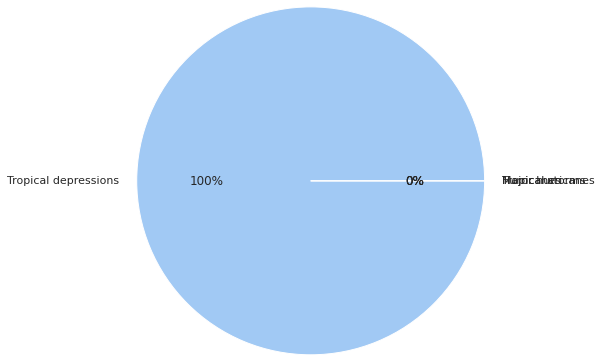

In [ ]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(category_values, labels = categories, colors = colors, autopct='%.0f%%', radius=2)
plt.show()

So, in the last three years, all the storms in the US have been categorised as Tropical Depressions with wind speed > 40 and < 73. 

In [ ]:
geometry = gpd.points_from_xy(data.LAT, data.LON)
geo_df = gpd.GeoDataFrame(data[['hurricane_category','LAT', 'LON',]], geometry=geometry)
geo_df.head()

,hurricane_category,LAT,LON,geometry
0,Tropical depressions,-10.20,161.80,POINT (-10.200 161.800)
1,Tropical depressions,-9.95,163.10,POINT (-9.950 163.100)
2,Tropical depressions,-9.60,164.40,POINT (-9.600 164.400)
3,Tropical depressions,-9.10,165.66,POINT (-9.100 165.660)
4,Tropical depressions,-8.60,166.80,POINT (-8.600 166.800)


The latitude and logitude of the tropical depressions that have occured in the last three years

In [ ]:
import glob 
import pandas as pd 
import xml.etree.ElementTree as ET 
from datetime import datetime

In [ ]:
def extract_from_csv(file_to_process): 
    dataframe = pd.read_csv(file_to_process) 
    return dataframe

In [ ]:
def extract():
      d=pd.DataFrame()
      for csvfile in glob.glob("/content/drive/MyDrive/last 3 years/*.csv"):
          d = d.append(extract_from_csv(csvfile), ignore_index=True)
      return d

In [ ]:
def transform(df):
      df['Datetime'] = pd.to_datetime(df['ISO_TIME'], format="%Y-%m-%d")
      df["Datetime"] = df['year'].astype(str) + '-' + df['month'].astype(str)+'-'+df['day'].astype(str)
      df = df[df['month'].notna()]
      df.drop(columns = ['day','year','hour','min'],inplace = True)
      return df


In [ ]:
def load(targetfile,data_to_load):
    data_to_load.to_csv(targetfile)

In [ ]:
extracted_data = extract()
extracted_data


,Unnamed: 0,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,USA_SSHS,NEW_CI,REU_TNUM,REU_CI,BOM_TNUM,BOM_CI,STORM_SPD,STORM_DR,year,month,day,hour,min,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Datetime
0,0,2019001S10162,2019,1,SP,MM,MONA,2018-12-31 18:00:00,NR,-10.20,161.80,main,22,22,O_____________,-3,-999.9,-999.9,-999.9,-999.9,-999.9,26,79,2018.0,12.0,31.0,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019001S10162,2019,1,SP,MM,MONA,2018-12-31 21:00:00,NR,-9.95,163.10,main,117,117,P_____________,-3,-999.9,-999.9,-999.9,-999.9,-999.9,26,77,2018.0,12.0,31.0,21.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2019001S10162,2019,1,SP,MM,MONA,2019-01-01 00:00:00,NR,-9.60,164.40,main,260,260,O_____________,-3,-999.9,-999.9,-999.9,-999.9,-999.9,27,71,2019.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2019001S10162,2019,1,SP,MM,MONA,2019-01-01 03:00:00,NR,-9.10,165.66,main,413,413,P_____________,-3,-999.9,-999.9,-999.9,-999.9,-999.9,26,67,2019.0,1.0,1.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2019001S10162,2019,1,SP,MM,MONA,2019-01-01 06:00:00,TS,-8.60,166.80,main,546,546,O_____________,-1,-999.9,-999.9,-999.9,-999.9,-999.9,22,68,2019.0,1.0,1.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90170,72135,2022128S09090,2022,26,SI,WA,KARIM,2022-05-10 21:00:00,NR,-19.27,93.51,PROVISIONAL,1886,1881,P_____________,0,-999.9,-999.9,-999.9,-999.9,-999.9,11,144,NaN,5.0,NaN,NaN,NaN,54100.0,36065.0,18030.0,18030.0,NaN,nan-5.0-nan
90171,72136,2022128S09090,2022,26,SI,WA,KARIM,2022-05-11 00:00:00,NR,-19.60,93.90,PROVISIONAL,1882,1839,O_____________,0,-999.9,-999.9,-999.9,-999.9,-999.9,9,101,NaN,5.0,NaN,NaN,NaN,54101.0,36066.0,18031.0,18031.0,NaN,nan-5.0-nan
90172,72137,2022128S09090,2022,26,SI,WA,KARIM,2022-05-11 03:00:00,NR,-19.44,94.44,PROVISIONAL,1831,1757,P_____________,0,-999.9,-999.9,-999.9,-999.9,-999.9,12,66,NaN,5.0,NaN,NaN,NaN,54102.0,36067.0,18032.0,18032.0,NaN,nan-5.0-nan
90173,72138,2022128S09090,2022,26,SI,WA,KARIM,2022-05-11 06:00:00,NR,-19.10,95.10,PROVISIONAL,1757,1694,O_____________,0,-999.9,-999.9,-999.9,-999.9,-999.9,14,68,NaN,5.0,NaN,NaN,NaN,54103.0,36068.0,18033.0,18033.0,NaN,nan-5.0-nan


In [ ]:
for csvfile in glob.glob("/content/drive/MyDrive/last 3 years"):
  print(csvfile)

/content/drive/MyDrive/last 3 years


In [ ]:
transformed_data = transform(extracted_data)
transformed_data

,Unnamed: 0,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,USA_SSHS,NEW_CI,REU_TNUM,REU_CI,BOM_TNUM,BOM_CI,STORM_SPD,STORM_DR,month,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Datetime
0,0,2019001S10162,2019,1,SP,MM,MONA,2018-12-31 18:00:00,NR,-10.20,161.80,main,22,22,O_____________,-3,-999.9,-999.9,-999.9,-999.9,-999.9,26,79,12.0,NaN,NaN,NaN,NaN,NaN,2018.0-12.0-31.0
1,1,2019001S10162,2019,1,SP,MM,MONA,2018-12-31 21:00:00,NR,-9.95,163.10,main,117,117,P_____________,-3,-999.9,-999.9,-999.9,-999.9,-999.9,26,77,12.0,NaN,NaN,NaN,NaN,NaN,2018.0-12.0-31.0
2,2,2019001S10162,2019,1,SP,MM,MONA,2019-01-01 00:00:00,NR,-9.60,164.40,main,260,260,O_____________,-3,-999.9,-999.9,-999.9,-999.9,-999.9,27,71,1.0,NaN,NaN,NaN,NaN,NaN,2019.0-1.0-1.0
3,3,2019001S10162,2019,1,SP,MM,MONA,2019-01-01 03:00:00,NR,-9.10,165.66,main,413,413,P_____________,-3,-999.9,-999.9,-999.9,-999.9,-999.9,26,67,1.0,NaN,NaN,NaN,NaN,NaN,2019.0-1.0-1.0
4,4,2019001S10162,2019,1,SP,MM,MONA,2019-01-01 06:00:00,TS,-8.60,166.80,main,546,546,O_____________,-1,-999.9,-999.9,-999.9,-999.9,-999.9,22,68,1.0,NaN,NaN,NaN,NaN,NaN,2019.0-1.0-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90170,72135,2022128S09090,2022,26,SI,WA,KARIM,2022-05-10 21:00:00,NR,-19.27,93.51,PROVISIONAL,1886,1881,P_____________,0,-999.9,-999.9,-999.9,-999.9,-999.9,11,144,5.0,54100.0,36065.0,18030.0,18030.0,NaN,nan-5.0-nan
90171,72136,2022128S09090,2022,26,SI,WA,KARIM,2022-05-11 00:00:00,NR,-19.60,93.90,PROVISIONAL,1882,1839,O_____________,0,-999.9,-999.9,-999.9,-999.9,-999.9,9,101,5.0,54101.0,36066.0,18031.0,18031.0,NaN,nan-5.0-nan
90172,72137,2022128S09090,2022,26,SI,WA,KARIM,2022-05-11 03:00:00,NR,-19.44,94.44,PROVISIONAL,1831,1757,P_____________,0,-999.9,-999.9,-999.9,-999.9,-999.9,12,66,5.0,54102.0,36067.0,18032.0,18032.0,NaN,nan-5.0-nan
90173,72138,2022128S09090,2022,26,SI,WA,KARIM,2022-05-11 06:00:00,NR,-19.10,95.10,PROVISIONAL,1757,1694,O_____________,0,-999.9,-999.9,-999.9,-999.9,-999.9,14,68,5.0,54103.0,36068.0,18033.0,18033.0,NaN,nan-5.0-nan


In [ ]:
type(transformed_data)

pandas.core.frame.DataFrame

In [ ]:
load("/content/drive/MyDrive/last 3 years/etl_3years.csv",transformed_data)

In [ ]:
#unique_basin=transformed_data.BASIN.unique()
# Basins include:
# NA - North Atlantic
# EP - Eastern North Pacific
# WP - Western North Pacific
# NI - North Indian
# SI - South Indian
# SP - Southern Pacific
# SA - South Atlantic

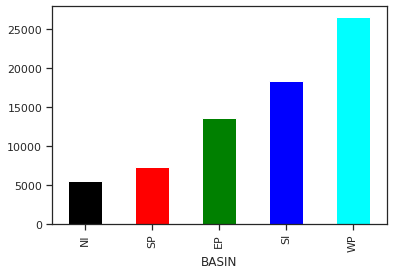

In [ ]:
import seaborn
transformed_data.groupby(['BASIN']).size().sort_values(ascending=True).plot(kind = "bar",color=['black', 'red', 'green', 'blue', 'cyan'])

This is assigned based on all available storm types. They include:

DS - Disturbance

TS - Tropical

ET - Extratropical

SS - Subtropical

NR - Not reported

MX - Mixture (contradicting nature reports from different agencies)

In [ ]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

In [ ]:
nf=transformed_data.groupby(['SUBBASIN']).DIST2LAND.agg([max]).sort_values(ascending=True,by='max').reset_index()
x=nf["SUBBASIN"]
y=nf["max"]



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


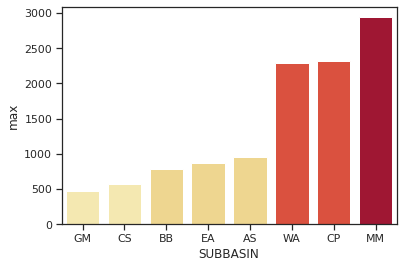

In [ ]:

sns.barplot(x, y, palette=colors_from_values(y, "YlOrRd"))

The storm types based on the subbasin sectors
The MM sector witnessed max wind speed reported.

## **Wind Direction**

In [ ]:
freq=transformed_data.groupby(["STORM_DR"]).size().reset_index()
freq.columns.values[1]="Frequency"
th=freq["STORM_DR"].to_list()
r=freq["Frequency"].to_list()

t=list(zip(r,th))
E=[]
for i in t:
  E.append(list(i))
E

[[1065, 0],
 [250, 1],
 [215, 2],
 [120, 3],
 [230, 4],
 [215, 5],
 [150, 6],
 [135, 7],
 [315, 8],
 [195, 9],
 [220, 10],
 [195, 11],
 [240, 12],
 [225, 13],
 [190, 14],
 [190, 15],
 [225, 16],
 [220, 17],
 [175, 18],
 [195, 19],
 [250, 20],
 [145, 21],
 [170, 22],
 [175, 23],
 [160, 24],
 [215, 25],
 [195, 26],
 [225, 27],
 [170, 28],
 [165, 29],
 [190, 30],
 [150, 31],
 [195, 32],
 [170, 33],
 [175, 34],
 [195, 35],
 [170, 36],
 [165, 37],
 [175, 38],
 [205, 39],
 [210, 40],
 [165, 41],
 [230, 42],
 [240, 43],
 [330, 44],
 [245, 45],
 [175, 46],
 [190, 47],
 [205, 48],
 [210, 49],
 [180, 50],
 [245, 51],
 [160, 52],
 [140, 53],
 [165, 54],
 [210, 55],
 [265, 56],
 [190, 57],
 [210, 58],
 [205, 59],
 [200, 60],
 [190, 61],
 [220, 62],
 [255, 63],
 [235, 64],
 [185, 65],
 [190, 66],
 [145, 67],
 [210, 68],
 [225, 69],
 [155, 70],
 [215, 71],
 [190, 72],
 [195, 73],
 [140, 74],
 [200, 75],
 [210, 76],
 [160, 77],
 [165, 78],
 [140, 79],
 [150, 80],
 [160, 81],
 [95, 82],
 [100, 83],
 [

In [ ]:
df3 = pd.DataFrame(E, columns =['WindSpeed', 'Direction'])
df3

,WindSpeed,Direction
0,1065,0
1,250,1
2,215,2
3,120,3
4,230,4
...,...,...
356,215,356
357,170,357
358,140,358
359,105,359


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


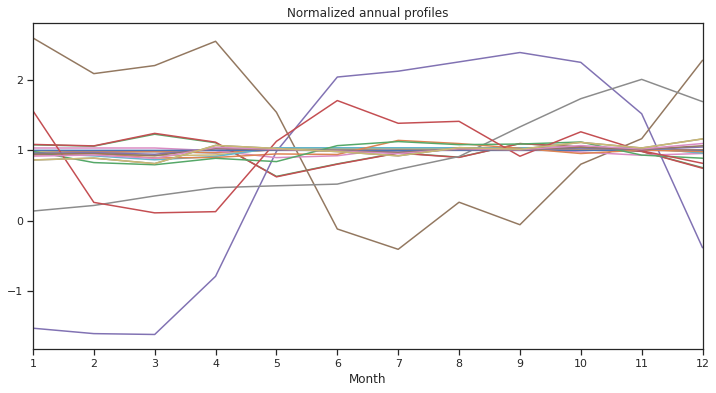

In [ ]:
ref_monthly_means = transformed_data.groupby(transformed_data["month"]).mean()

fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
(ref_monthly_means/transformed_data.mean()).plot(legend=False, xlim=[1,12], ax=ax, title='Normalized annual profiles')
ax.set_xticks(ref_monthly_means.index.values)
ax.set_xlabel('Month')
plt.show()

We are seeing a plot that is normalizing the monthly mean wind speeds by the long-term mean for each month.

In [ ]:
!pip install windrose openpyxl

In [ ]:
from windrose import WindroseAxes

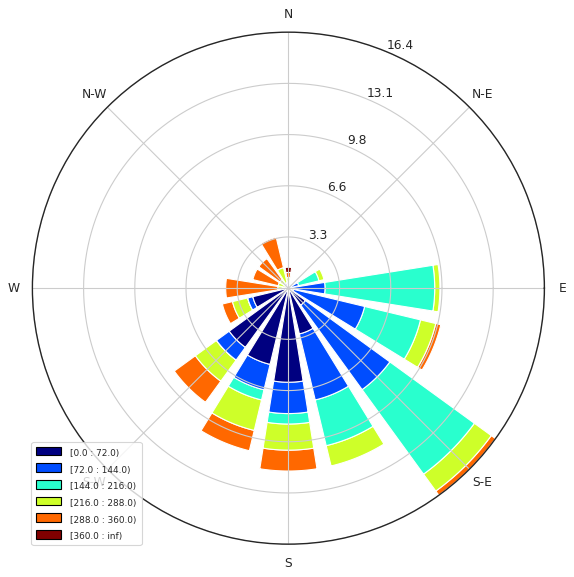

In [ ]:
ax = WindroseAxes.from_ax()
ax.bar(df3.WindSpeed, df3.Direction, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

The storms that have occured are mostly directed between the South-East and the South,East directions while we have a few towards the West and North-West direction as well.

In [ ]:
!pip install dataprep

In [ ]:
from dataprep.eda import create_report

In [ ]:
report=create_report(transformed_data)
report.save('report')

Report has been saved to report.html!


Our entire analysis is summarised in this html file. 